# Compare results per action

In [1]:
cd /mnt/sda/otani/Experiments/moment_retrieval

/mnt/sda/otani/Experiments/moment_retrieval


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from src.toolbox.visualization import plot_performance_per_class, plot_ranking_comparison
import seaborn as sns
import pickle as pkl

In [56]:
from typing import List, Tuple, Dict
import matplotlib.pyplot as plt
import numpy as np
import json
from matplotlib.gridspec import GridSpec

def plot_ranking_comparison(
    metrics_per_cls_a: Dict[str, dict],
    metrics_per_cls_b: Dict[str, dict],
    label_a: str,
    label_b: str,
):

    fig = plt.figure(figsize=(10, 40))
    rate_success_a = [
        metrics["rate_success"] for metrics in metrics_per_cls_a.values()
    ]
    n_success_a = [
        metrics["n_success"] for metrics in metrics_per_cls_a.values()
    ]
    n_instance_a = [
        metrics["n_instance"] for metrics in metrics_per_cls_a.values()
    ]

    rate_success_b = [
        metrics["rate_success"] for metrics in metrics_per_cls_b.values()
    ]
    n_success_b = [
        metrics["n_success"] for metrics in metrics_per_cls_b.values()
    ]
    n_instance_b = [
        metrics["n_instance"] for metrics in metrics_per_cls_b.values()
    ]

    gs = GridSpec(1, 4)
    axes_a = fig.add_subplot(gs[0, 0])
    axes_a.barh(
        rate_success_a, n_instance_a, height=0.01, color="darkgrey", alpha=0.7
    )
    axes_a.barh(rate_success_a, n_success_a, height=0.01, color="limegreen")
    axes_a.invert_xaxis()
    axes_a.set_ylim(0, 1)
    axes_a.axis("off")

    axes_b = fig.add_subplot(gs[0, 3])
    axes_b.barh(
        rate_success_b, n_instance_b, height=0.01, color="darkgrey", alpha=0.7
    )
    axes_b.barh(rate_success_b, n_success_b, height=0.01, color="limegreen")
    axes_b.set_yticks([])
    axes_b.set_ylim(0, 1)
    axes_b.axis("off")

    axes_c = fig.add_subplot(gs[0, 1:3])
    axes_c.set_ylim(0, 1)
    axes_c.set_xlim(0, 1)
    xmin, xmax = axes_c.get_xlim()
    for cls_label in metrics_per_cls_a.keys():
        rate_a = metrics_per_cls_a[cls_label]["rate_success"]
        rate_b = metrics_per_cls_b[cls_label]["rate_success"]
        random_offset = np.random.choice([0, 0.15])
        axes_c.plot((0.0+random_offset, 1-random_offset), (rate_a, rate_b), color="darkgrey", linewidth=1)
        text_a = axes_c.text(
            xmin+random_offset,
            rate_a,
            cls_label,
            verticalalignment="center",
            fontsize=8,
            bbox=dict(facecolor="w"),
        )
        text_b = axes_c.text(
            xmax-random_offset,
            rate_b,
            cls_label,
            verticalalignment="center",
            horizontalalignment="right",
            fontsize=8,
            bbox=dict(facecolor="w"),
        )
    axes_c.axis("off")


In [37]:
baseline = pkl.load(open("reports/figure_src/metrics_per_cls/charade/action_blind.pkl", "rb"))
scdm = pkl.load(open("reports/figure_src/metrics_per_cls/charade/scdm.pkl", "rb"))

In [38]:
top_actions = [l for l, v in baseline.items() if v["n_instance"] < 100]
baseline = {l: v for l, v in baseline.items() if l in top_actions}
scdm = {l: v for l, v in scdm.items() if l in top_actions}

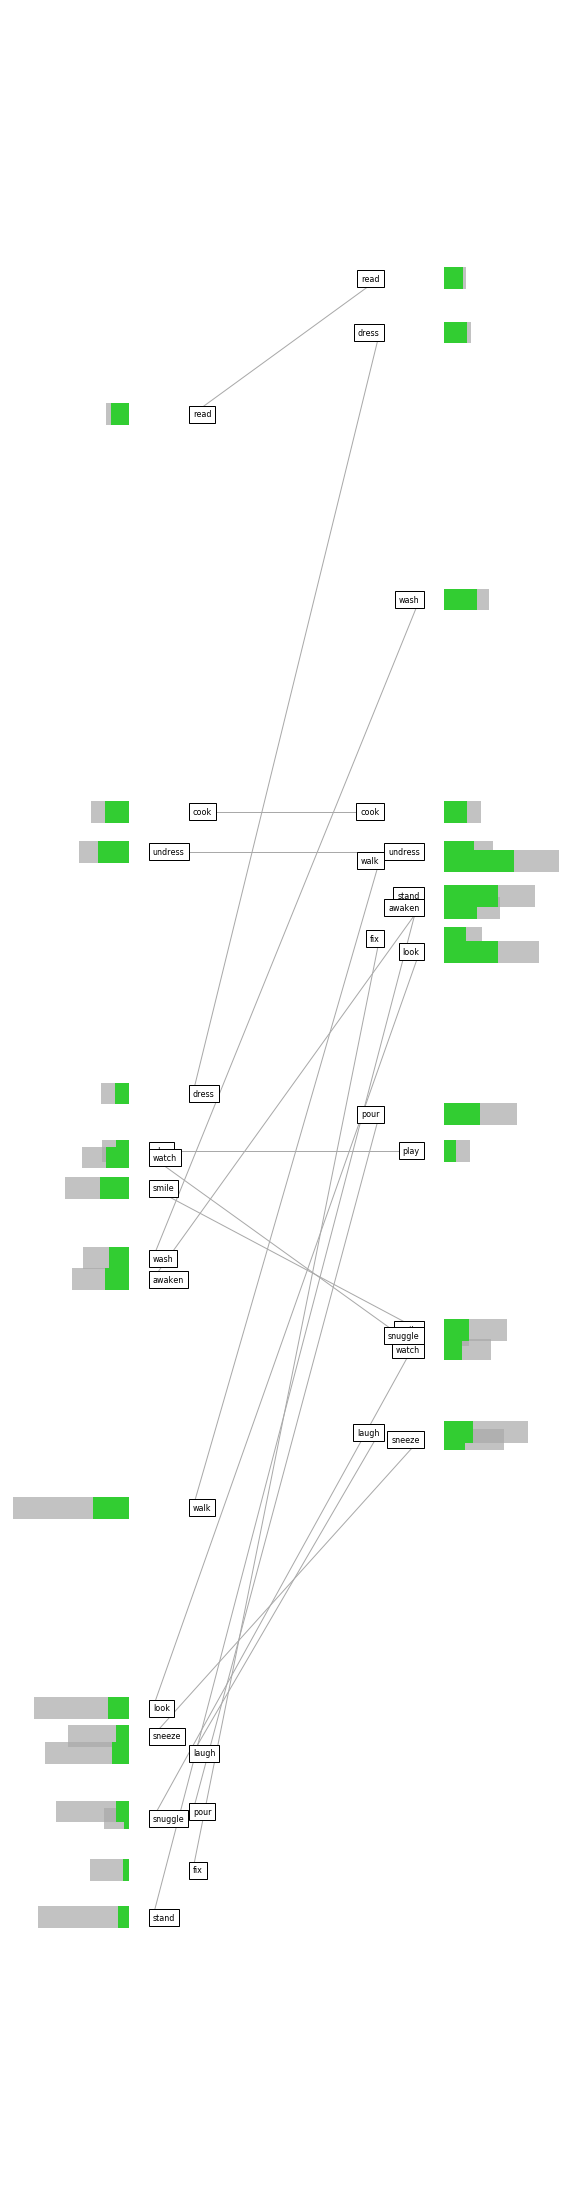

In [59]:
plot_ranking_comparison(baseline, scdm, label_a="baseline", label_b="scdm")